In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Capt1=pd.read_csv('../Data_capteurs/csv_A8032A31204E.csv')
Capt2=pd.read_csv('../Data_capteurs/csv_AB032A311FAA.csv')
Capt3=pd.read_csv('../Data_capteurs/csv_C45BBE37B346.csv')
Capt4=pd.read_csv('../Data_capteurs/csv_C45BBE39F9AE.csv')
Capt5=pd.read_csv('../Data_capteurs/csv_C45BBE39F42A.csv')
Capt6=pd.read_csv('../Data_capteurs/csv_C45BBE39F56A.csv')
Capt7=pd.read_csv('../Data_capteurs/csv_C45BBE384CD2.csv')
Capt8=pd.read_csv('../Data_capteurs/csv_C45BBE39870E.csv')
Capt9=pd.read_csv('../Data_capteurs/csv_C45BBE386362.csv')
Capt10=pd.read_csv('../Data_capteurs/csv_C45BBE386952.csv')

List_Capt=[Capt1,Capt2,Capt3,Capt4,Capt5,Capt6,Capt7,Capt8,Capt9,Capt10]
#liste_df <- split(df, df$ID)

In [42]:
list_capteurs = ['C45BBE384CD2', 'C45BBE386362', 'C45BBE386952', 'C45BBE39870E', 'C45BBE39F42A', 'C45BBE39F56A', 'C45BBE39F9AE', 'AB032A311FAA', 'A8032A31204E', 'C45BBE37B346', 'A8032A311FAA', 'C45BBE39F4D6']
list_capteurs_dist = {'C45BBE384CD2' : 0, 'C45BBE386362' : 80, 'C45BBE386952' : 65, 'C45BBE39870E' : 0, 'C45BBE39F42A' : 0, 'C45BBE39F56A' : 56, 'C45BBE39F9AE' : 13, 'AB032A311FAA' : 4, 'A8032A31204E' : 29, 'C45BBE37B346' : 52}

In [4]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  return list( seen_twice )

In [29]:
# comparaison du rssi trouvé par capteur par rapport à l'ensemble
differents_rssi=[]

def position3(differents_rssi, nb_capt):
    L=[[]*10]
    for i in range(len(List_Capt)):
        for col in List_Capt[i].columns:
            df2=pd.DataFrame(List_Capt[i][col])
            for index, row in df2.iterrows():
                if row[0] == differents_rssi[i]:
                    L[i].append(int(col))
    Bool = True
    while Bool:
        intersection = L[0]
        for i in range(1, len(L)):
            set1 = set(L[i])
            set2 = set(intersection)
            intersection = list(set1 & set2)
        if intersection != []:
            Bool = False
            return sum(intersection)/len(intersection)
        else:
            position3(differents_rssi, nb_capt-1)

    # if list_duplicates(L)!=[]:
    #     return sum(list_duplicates(L)) / len(list_duplicates(L))
    # elif L!=[]:
    #     return sum(L)/len(L)
    # else:
    #     return 0

In [30]:
position3([0, 0, 0, -60, 0, 0, 0, -60, -70, -50])

50.0

In [31]:
df = pd.read_csv('../tableau_brute.csv')
df2 = df.loc[df['metre'] == 30]
df3 = df2.groupby('macModule')['rssi'].mean()
df4 = pd.DataFrame(df3)
df4

,rssi
macModule,
A8032A31204E,-62.833333
C45BBE37B346,-80.000000


In [61]:
# estimation pour chaque mètre

def generer_rssi(m):
    L=[0]*12
    df = pd.read_csv('../tableau_brute.csv')
    df2 = df.loc[df['metre'] == m]
    df3 = pd.DataFrame(df2.groupby('macModule')['rssi'].max())
    for capt in df3.index:
        i = list_capteurs.index(capt)
        L[i] = df3['rssi'][capt]
    return L

In [62]:
generer_rssi(30)

[0, 0, 0, 0, 0, 0, 0, 0, -49, -80, 0, 0]

In [63]:
X=[]
for i in range(30, 61):
    X.append(position3(generer_rssi(i)))

In [65]:
x = X
for i, val in enumerate(x):
    if val == 0:
        x[i] = i+30

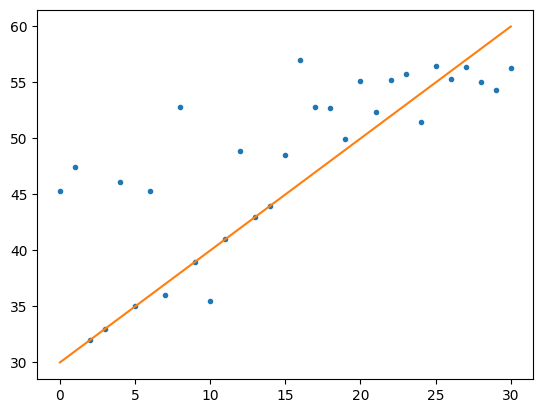

In [67]:
plt.plot(x, '.')
plt.plot([i for i in range(30, 61)])